<a href="https://colab.research.google.com/github/subhramit/frcnn_ECUSTFD/blob/main/frcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile 
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import zipfile
import cv2
import copy

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from matplotlib import cm
from PIL import Image
import pandas as pd
from collections import defaultdict
import csv

In [3]:
!pip install tensorflow==1.13.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install tensorflow-object-detection-api

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
sys.path.append("..")
from object_detection.utils import ops as utils_ops

In [6]:
os.getcwd()

'/content'

In [7]:
ls

drive/  model/  sample_data/


In [8]:
if StrictVersion(tf.__version__) < StrictVersion('1.9.0'):
  raise ImportError('Please upgrade your TensorFlow installation to v1.9.* or later!')

In [9]:
# from utils import label_map_util
# from utils import visualization_utils as vis_util

from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

In [10]:
# What model to download.
MODEL_NAME = '/content/model/frcnn_inception'

In [11]:
PATH_TO_FROZEN_GRAPH = MODEL_NAME + '/frozen_inference_graph.pb'

In [12]:
PATH_TO_LABELS = '/content/model/frcnn_inception/frcnn.pbtxt'

In [13]:
MODEL_NAME = '/content/model/frcnn_inception'

In [14]:
PATH_TO_FROZEN_GRAPH = MODEL_NAME + '/frozen_inference_graph.pb'

In [15]:
PATH_TO_LABELS = '/content/model/frcnn_inception/frcnn.pbtxt'

In [16]:
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

In [17]:
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

In [18]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [19]:
"""dicSide = { 'apple':[], 'banana':[], 'bread':[], 'bun':[],
        'doughnut':[], 'egg':[], 'fired_dough_twist':[],
        'grape':[], 'lemon':[], 'litchi':[], 'mango':[],
        'mooncake':[], 'orange':[], 'peach':[], 'pear':[],
        'plum':[], 'qiwi':[], 'sachima':[], 'tomato':[],'mix':[] }
dicTop = { 'apple':[], 'banana':[], 'bread':[], 'bun':[],
        'doughnut':[], 'egg':[], 'fired_dough_twist':[],
        'grape':[], 'lemon':[], 'litchi':[], 'mango':[],
        'mooncake':[], 'orange':[], 'peach':[], 'pear':[],
        'plum':[], 'qiwi':[], 'sachima':[], 'tomato':[],'mix':[] }"""
dicSd={}
dicTp={}

In [89]:
PATH_TO_TEST_IMAGES_DIR = '/content/model/test'

In [90]:
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, file) for file in os.listdir(PATH_TO_TEST_IMAGES_DIR) if 'JPG' in file]

In [91]:
#TEST_IMAGE_PATHS=[os.path.join(PATH_TO_TEST_IMAGES_DIR,"fired_dough_twist001T(7).JPG")]
# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

In [92]:
for file in os.listdir(PATH_TO_TEST_IMAGES_DIR):
    if 'JPG' in file:
        sito = file.split('(')[0][-1]
        cate = file.split('0')[0]
        speci = file.split('(')[0][:-1]
        if cate not in dicSd.keys():
            dicSd[cate]=defaultdict(list)
            dicTp[cate]=defaultdict(list)
        """if sito.upper()=='S':
            dicSd[cate][speci].append(file)
        else:
            dicTp[cate][speci].append(file)"""
print(dicSd)

{'fired_dough_twist': defaultdict(<class 'list'>, {}), 'lemon': defaultdict(<class 'list'>, {}), 'mix': defaultdict(<class 'list'>, {}), 'apple': defaultdict(<class 'list'>, {}), 'orange': defaultdict(<class 'list'>, {}), 'doughnut': defaultdict(<class 'list'>, {}), 'banana': defaultdict(<class 'list'>, {}), 'bread': defaultdict(<class 'list'>, {}), 'mooncake': defaultdict(<class 'list'>, {}), 'pear': defaultdict(<class 'list'>, {}), 'mango': defaultdict(<class 'list'>, {}), 'qiwi': defaultdict(<class 'list'>, {}), 'plum': defaultdict(<class 'list'>, {}), 'grape': defaultdict(<class 'list'>, {}), 'tomato': defaultdict(<class 'list'>, {}), 'egg': defaultdict(<class 'list'>, {}), 'bun': defaultdict(<class 'list'>, {}), 'litchi': defaultdict(<class 'list'>, {}), 'sachima': defaultdict(<class 'list'>, {}), 'peach': defaultdict(<class 'list'>, {})}


In [93]:
"""for ke in dicSd.keys():
    print(ke,'-> ',len(dicSd[ke]),len(dicTp[ke]))
    for ke2,val in dicSd[ke].items():
        print('\t',ke2,'-> ',len(val),len(dicTp[ke][ke2]),"---",len(val)-len(dicTp[ke][ke2]))
print(dicTp['grape'],"\n",dicSd['grape'])"""

'for ke in dicSd.keys():\n    print(ke,\'-> \',len(dicSd[ke]),len(dicTp[ke]))\n    for ke2,val in dicSd[ke].items():\n        print(\'\t\',ke2,\'-> \',len(val),len(dicTp[ke][ke2]),"---",len(val)-len(dicTp[ke][ke2]))\nprint(dicTp[\'grape\'],"\n",dicSd[\'grape\'])'

In [94]:
def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session() as sess:
      # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
      if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[0], image.shape[1])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

      # Run inference
      output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: np.expand_dims(image, 0)})

      # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict[
          'detection_classes'][0].astype(np.uint8)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
  return output_dict

In [95]:
shape = {'ellipsoid':['apple','egg','lemon','orange','peach','plum','qiwi','tomato','mix'],
        'column':['bread','grape','mooncake','sachima'],
        'irregular':['banana','bun','doughnut','fired_dough_twist','litchi','mango','pear']}


In [96]:
def findShape(shapes,exp):
    for k,v in shapes.items():
        for elem in v:
            if exp==elem:
                return k

In [97]:
!pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [98]:
xls_to_dict={}
xls = pd.ExcelFile("/content/model/density.xls")
for i in range(20):
    sheetX = xls.parse(i) #2 is the sheet number
    idd = sheetX['id']
    typee = sheetX['type']
    vol = sheetX['volume(mm^3)']
    wei = sheetX['weight(g)']
    if 'mix' in idd[0]:
        xls_to_dict['mix']={}
    else:
        xls_to_dict[typee[0]]={}
    for k in range(len(idd)):
        if 'mix' in idd[0]:
            xls_to_dict['mix'][idd[k]]=[vol[k],wei[k]]
        else:
            xls_to_dict[typee[0]][idd[k]]=[vol[k],wei[k]]

In [99]:
print(len(TEST_IMAGE_PATHS),"<<<<TEST_IMAGE_PATHS LENNNN")

4 <<<<TEST_IMAGE_PATHS LENNNN


In [100]:
sys.path.append(os.path.abspath("/content/model"))


In [101]:
import visualization_utils as vis_util

In [102]:
%matplotlib inline

4 <<<<TEST_IMAGE_PATHS LENNNN
1 <><><numero><><>
/content/model/test/apple013T-8-_JPG.rf.49ea92e022715df8631d91c157d2b596.jpg
300 <<<<<<<<< apple013T-8-_JPG.rf.49ea92e022715df8631d91c157d2b596.jpg
************** ['coin', 'apple'] ******************
{'coin': [48, 87, 128, 159, 99.6968924999237], 'apple': [200, 347, 125, 228, 90.71331024169922]} <<<<<<<<< apple013T-8-_JPG.rf.49ea92e022715df8631d91c157d2b596.jpg


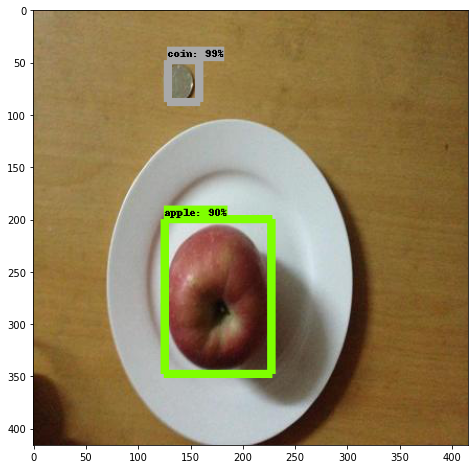

2 <><><numero><><>
/content/model/test/apple001T-1-_JPG.rf.93ad29e87bb9299ceb2bea1cac1dba0a.jpg
300 <<<<<<<<< apple001T-1-_JPG.rf.93ad29e87bb9299ceb2bea1cac1dba0a.jpg
************** ['coin', 'apple'] ******************
{'coin': [227, 264, 45, 78, 99.43289160728455], 'apple': [121, 271, 181, 302, 96.00852131843567]} <<<<<<<<< apple001T-1-_JPG.rf.93ad29e87bb9299ceb2bea1cac1dba0a.jpg


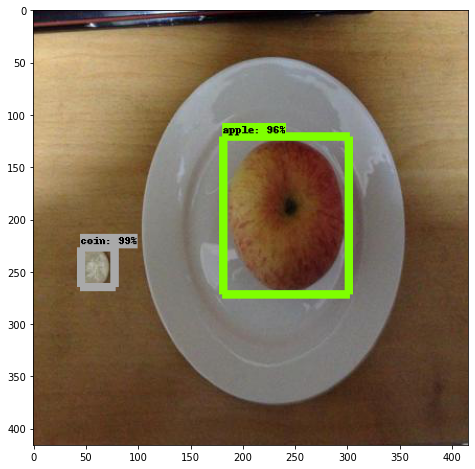

3 <><><numero><><>
/content/model/test/apple013T-3-_JPG.rf.2023b50d0e1c0fbbfc8e59fc0cb91fa1.jpg
300 <<<<<<<<< apple013T-3-_JPG.rf.2023b50d0e1c0fbbfc8e59fc0cb91fa1.jpg
************** ['coin', 'apple'] ******************
{'coin': [30, 74, 105, 139, 99.53750967979431], 'apple': [160, 331, 135, 257, 96.69793844223022]} <<<<<<<<< apple013T-3-_JPG.rf.2023b50d0e1c0fbbfc8e59fc0cb91fa1.jpg


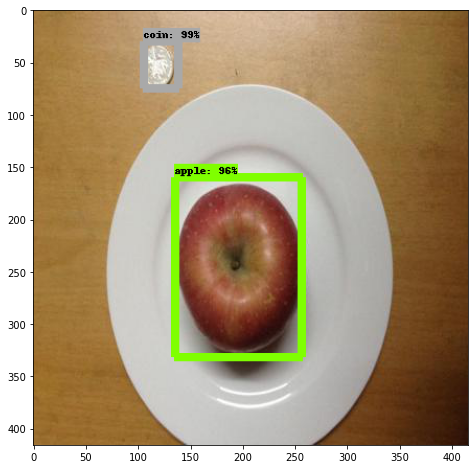

4 <><><numero><><>
/content/model/test/apple003T-1-_JPG.rf.687f8ffb7b140f01d4d25e76da78b024.jpg
300 <<<<<<<<< apple003T-1-_JPG.rf.687f8ffb7b140f01d4d25e76da78b024.jpg
************** ['coin', 'apple'] ******************
{'coin': [38, 79, 330, 365, 99.44891929626465], 'apple': [153, 315, 176, 303, 97.26800918579102]} <<<<<<<<< apple003T-1-_JPG.rf.687f8ffb7b140f01d4d25e76da78b024.jpg


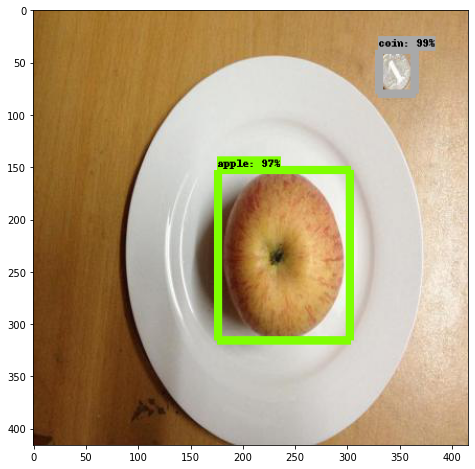

In [103]:
dicSide=defaultdict(list)
dicTop=defaultdict(list)

print(len(TEST_IMAGE_PATHS),"<<<<TEST_IMAGE_PATHS LENNNN")

breaker=0
cnt=0
whichh='mix'
for image_path in TEST_IMAGE_PATHS:
  cnt+=1
  print(cnt,"<><><numero><><>")
  print(image_path)
  if whichh in image_path:
      continue
  image = Image.open(image_path)
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = load_image_into_numpy_array(image)
  # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
  image_np_expanded = np.expand_dims(image_np, axis=0)
  # Actual detection.
  output_dict = run_inference_for_single_image(image_np, detection_graph)
  # Visualization of the results of a detection.
  print(len(output_dict['detection_boxes']),"<<<<<<<<<",image_path.split('/')[-1])
  coordinates = vis_util.return_coordinates(
                        image_np,
                        output_dict['detection_boxes'],
                        output_dict['detection_classes'],
                        output_dict['detection_scores'],
                        category_index,
                        use_normalized_coordinates=True,
                        line_thickness=8,
                        min_score_thresh=0.5)
  #[ymin, ymax, xmin, xmax, (box_to_score_map[box]*100)] y->height x->width
  print(coordinates,"<<<<<<<<<",image_path.split('/')[-1])
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks'),
      use_normalized_coordinates=True,
      line_thickness=8)
  plt.figure(figsize=IMAGE_SIZE)
  plt.imshow(image_np)
  plt.show()


